In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sys import path as sys_path
from os import path
import pathlib
# print(path.join(pathlib.Path().absolute(), '..'))

# The directory containing this file
HERE = path.join(pathlib.Path().absolute(), '..')
if HERE not in sys_path:
    sys_path.insert(0, HERE)

from truefilm.rating import benchmark, load_imdb, load_wiki, merge_levenshtein

max_movies = 10
imdbfile_path = path.join(HERE, 'data', 'archive.zip')
wikipediafile_path = path.join(HERE, 'data', 'enwiki-latest-abstract.xml.gz')

roi_data = benchmark(load_imdb)(imdbfile_path).sort_values(by='roi_ratio', ascending=False)[:max_movies]
wiki_data = benchmark(load_wiki)(wikipediafile_path)
data = benchmark(merge_levenshtein)(roi_data, wiki_data)

data
# https://www.kdnuggets.com/2021/03/11-essential-code-blocks-exploratory-data-analysis.html
# data = pd.read_csv('melb_data.csv')

[2021-03-09 14:52:43.714059] [started at 2021-03-09 14:52:36.437820] truefilm.rating.load_imdb duration : 0:00:07.276239
[2021-03-09 15:04:25.370889] [started at 2021-03-09 14:52:43.733774] truefilm.rating.load_wiki duration : 0:11:41.637115
[2021-03-09 15:06:31.955217] [started at 2021-03-09 15:04:25.371468] truefilm.rating.merge_levenshtein duration : 0:02:06.583749


release_date                original_title    imdb_id  \
0   2007-09-14           Paranormal Activity  tt1179904   
1   1999-07-14       The Blair Witch Project  tt0185937   
2   2015-12-16                            대호  tt5066556   
3   1977-03-19                    Eraserhead  tt0074486   
4   1972-06-01                          猛龍過江  tt0068935   
5   1972-03-12                Pink Flamingos  tt0069089   
6   2004-01-17                 Super Size Me  tt0390521   
7   2015-07-10                   The Gallows  tt2309260   
8   2004-08-06                    Open Water  tt0374102   
9   1974-10-01  The Texas Chain Saw Massacre  tt0072271   

                             title  movie_id  release_year  \
0              Paranormal Activity     14192        2007.0   
1          The Blair Witch Project      2595        1999.0   
2  The Tiger: An Old Hunter's Tale     41472        2015.0   
3                       Eraserhead      3554        1977.0   
4            The Way of the Dragon      4316        1972.0   
5                   Pink Flamingos      2248        1972.0   
6                    Super Size Me      7788        2004.0   
7                      The Gallows     31628        2015.0   
8                       Open Water      9461        2004.0   
9     The Texas Chain Saw Massacre      2346        1974.0   

                                production_companies  rating      revenue  \
0                Blumhouse Productions, Solana Films     5.9  193355800.0   
1                 Artisan Entertainment, Haxan Films     6.3  248000000.0   
2           Next Entertainment World, Sanai Pictures     7.5   11083449.0   
3         American Film Institute (AFI), Libra Films     7.5    7000000.0   
4   Golden Harvest Company, Concord Productions Inc.     7.4   85000000.0   
5                              Dreamland Productions     6.2    6000000.0   
6                                   Kathbur Pictures     6.6   28575078.0   
7  New Line Cinema, Blumhouse Productions, Manage...     4.9   42664410.0   
8                                Plunge Pictures LLC     5.3   54667954.0   
9                            New Line Cinema, Vortex     7.1   30859000.0   

     budget     roi_ratio  page_id  \
0   15000.0  12890.386667  2847375   
1   60000.0   4133.333333  2313570   
2    5000.0   2216.689800  4888434   
3   10000.0    700.000000  3911481   
4  130000.0    653.846154  5122070   
5   12000.0    500.000000   145188   
6   65000.0    439.616585   242090   
7  100000.0    426.644100  4718460   
8  130000.0    420.522723   301248   
9   85000.0    363.047059    14752   

                                   page_title  \
0              Wikipedia: Paranormal Activity   
1          Wikipedia: The Blair Witch Project   
2  Wikipedia: The Tiger: An Old Hunter's Tale   
3                       Wikipedia: Eraserhead   
4           Wikipedia: The Prey of the Dragon   
5                   Wikipedia: Pink Flamingos   
6                    Wikipedia: Super Size Me   
7                      Wikipedia: The Gallows   
8                Wikipedia: Open Water (film)   
9     Wikipedia: The Texas Chain Saw Massacre   

                  page_movie_title  \
0              paranormal activity   
1          the blair witch project   
2  the tiger: an old hunter's tale   
3                       eraserhead   
4           the prey of the dragon   
5                   pink flamingos   
6                    super size me   
7                      the gallows   
8                       open water   
9     the texas chain saw massacre   

                                            page_url  \
0  https://en.wikipedia.org/wiki/Paranormal_Activity   
1  https://en.wikipedia.org/wiki/The_Blair_Witch_...   
2  https://en.wikipedia.org/wiki/The_Tiger:_An_Ol...   
3           https://en.wikipedia.org/wiki/Eraserhead   
4  https://en.wikipedia.org/wiki/The_Prey_of_the_...   
5       https://en.wikipedia.org/wiki/Pink_Flamingos   
6        https://en.wikipedia.org/wiki/Super_Size_M

In [4]:
data[['title', 'page_title']]
data.shape
data.dtypes

release_date             object
original_title           object
imdb_id                  object
title                    object
movie_id                  int64
release_year            float64
production_companies     object
rating                  float64
revenue                 float64
budget                  float64
roi_ratio               float64
page_id                   int64
page_title               object
page_movie_title         object
page_url                 object
page_abstract            object
dtype: object

In [5]:
data.head()
data.tail()
data.sample(5)

release_date           original_title    imdb_id                    title  \
5   1972-03-12           Pink Flamingos  tt0069089           Pink Flamingos   
1   1999-07-14  The Blair Witch Project  tt0185937  The Blair Witch Project   
0   2007-09-14      Paranormal Activity  tt1179904      Paranormal Activity   
7   2015-07-10              The Gallows  tt2309260              The Gallows   
4   1972-06-01                     猛龍過江  tt0068935    The Way of the Dragon   

   movie_id  release_year                               production_companies  \
5      2248        1972.0                              Dreamland Productions   
1      2595        1999.0                 Artisan Entertainment, Haxan Films   
0     14192        2007.0                Blumhouse Productions, Solana Films   
7     31628        2015.0  New Line Cinema, Blumhouse Productions, Manage...   
4      4316        1972.0   Golden Harvest Company, Concord Productions Inc.   

   rating      revenue    budget     roi_ratio  page_id  \
5     6.2    6000000.0   12000.0    500.000000   145188   
1     6.3  248000000.0   60000.0   4133.333333  2313570   
0     5.9  193355800.0   15000.0  12890.386667  2847375   
7     4.9   42664410.0  100000.0    426.644100  4718460   
4     7.4   85000000.0  130000.0    653.846154  5122070   

                           page_title         page_movie_title  \
5           Wikipedia: Pink Flamingos           pink flamingos   
1  Wikipedia: The Blair Witch Project  the blair witch project   
0      Wikipedia: Paranormal Activity      paranormal activity   
7              Wikipedia: The Gallows              the gallows   
4   Wikipedia: The Prey of the Dragon   the prey of the dragon   

                                            page_url  \
5       https://en.wikipedia.org/wiki/Pink_Flamingos   
1  https://en.wikipedia.org/wiki/The_Blair_Witch_...   
0  https://en.wikipedia.org/wiki/Paranormal_Activity   
7          https://en.wikipedia.org/wiki/The_Gallows   
4  https://en.wikipedia.org/wiki/The_Prey_of_the_...   

                                       page_abstract  
5                     | narrator       = John Waters  
1                                 | producers      =  
0                       | writer         = Oren Peli  
7                                 | producer       =  
4  The Prey of the Dragon is a 1921 British silen...

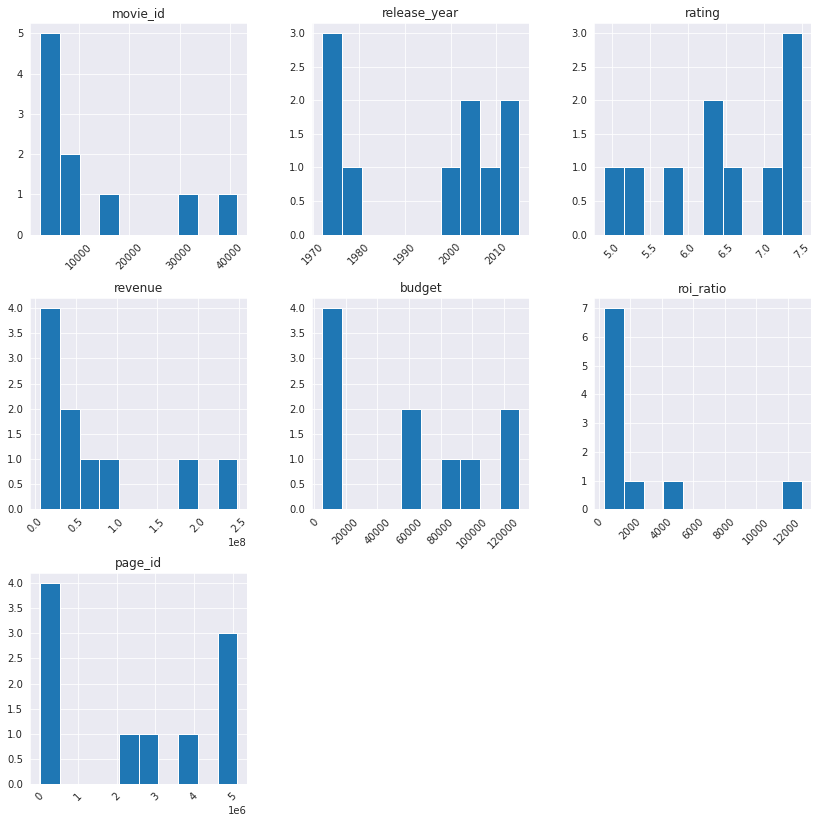

In [6]:
data.hist(figsize=(14,14), xrot=45)
plt.show()

In [7]:
data.describe()

movie_id  release_year     rating       revenue         budget  \
count     10.000000     10.000000  10.000000  1.000000e+01      10.000000   
mean   11960.000000   1993.900000   6.470000  7.072057e+07   61200.000000   
std    13703.071489     18.052085   0.922617  8.359091e+07   49317.114451   
min     2248.000000   1972.000000   4.900000  6.000000e+06    5000.000000   
25%     2834.750000   1974.750000   5.975000  1.545636e+07   12750.000000   
50%     6052.000000   2001.500000   6.450000  3.676170e+07   62500.000000   
75%    13009.250000   2006.250000   7.325000  7.741699e+07   96250.000000   
max    41472.000000   2015.000000   7.500000  2.480000e+08  130000.000000   

          roi_ratio       page_id  
count     10.000000  1.000000e+01  
mean    2274.408642  2.450467e+06  
std     3919.783513  2.141621e+06  
min      363.047059  1.475200e+04  
25%      429.887221  2.568795e+05  
50%      576.923077  2.580472e+06  
75%     1837.517350  4.516715e+06  
max    12890.386667  5.122070e+06

In [8]:
data.describe(include='object')

release_date  original_title    imdb_id           title  \
count            10              10         10              10   
unique           10              10         10              10   
top      2015-07-10  Pink Flamingos  tt0069089  Pink Flamingos   
freq              1               1          1               1   

                       production_companies              page_title  \
count                                    10                      10   
unique                                   10                      10   
top     Blumhouse Productions, Solana Films  Wikipedia: The Gallows   
freq                                      1                       1   

               page_movie_title                                   page_url  \
count                        10                                         10   
unique                       10                                         10   
top     the blair witch project  https://en.wikipedia.org/wiki/The_Gallows   
freq                          1                                          1   

                                page_abstract  
count                                      10  
unique                                     10  
top     Supersize Me (Beavis and Butt-Head)}}  
freq                                        1

In [9]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        sns.countplot(y=column, data=data)
        plt.show()

In [11]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        sns.boxplot(y=column, x='Price', data=data)
        plt.show()

In [12]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        display(data.groupby(column).mean())

In [13]:
corrs = data.corr()
corrs

movie_id  release_year    rating   revenue    budget  roi_ratio  \
movie_id      1.000000      0.747994 -0.149246 -0.198281 -0.167970   0.086384   
release_year  0.747994      1.000000 -0.497877  0.224381 -0.035295   0.329881   
rating       -0.149246     -0.497877  1.000000 -0.236429 -0.324146  -0.167410   
revenue      -0.198281      0.224381 -0.236429  1.000000  0.043136   0.699247   
budget       -0.167970     -0.035295 -0.324146  0.043136  1.000000  -0.393567   
roi_ratio     0.086384      0.329881 -0.167410  0.699247 -0.393567   1.000000   
page_id       0.554334      0.217109  0.227871  0.083354 -0.062062   0.129451   

               page_id  
movie_id      0.554334  
release_year  0.217109  
rating        0.227871  
revenue       0.083354  
budget       -0.062062  
roi_ratio     0.129451  
page_id       1.000000

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()